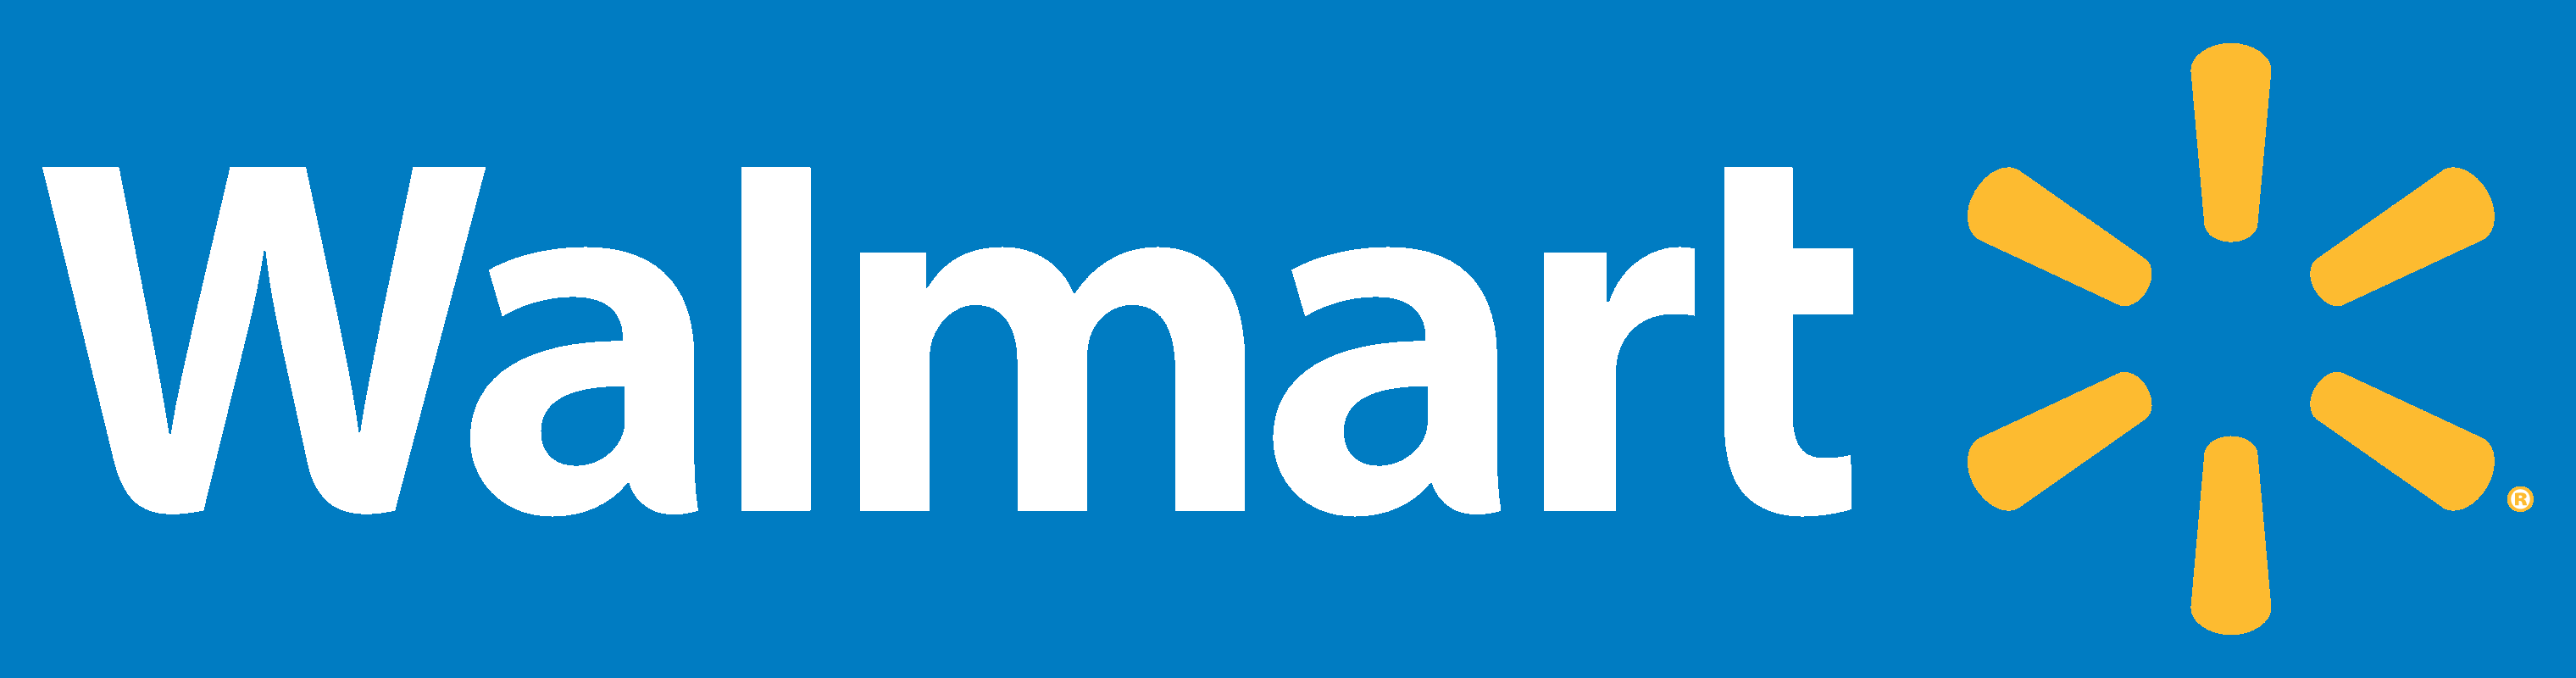

# <font color="purple" size="5">**About Walmart**</font>


<b>Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.</b>


## <font color="purple" size="5">**Business Problem**</font>

<b>The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).</b>

## <font color="purple" size="5">**Dataset**</font>

<b>The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:</b>


<table>
        <tbody>
            <tr>
                <th>User_ID :   User ID</th>
                <td> </td>
            </tr>
            <tr>
                <th>Product_ID :   Product ID</th>
                <td> </td>
            </tr>
            <tr>
                <th>Gender :   Sex of User</th>
                <td> </td>
            </tr>
            <tr>
                <th>Age :   Age in bins</th>
                <td> </td>
            </tr>
            <tr>
                <th>Occupation :   Occupation(Masked)</th>
                <td> </td>
            </tr>
            <tr>
                <th>City_Category :   	Category of the City (A,B,C)</th>
                <td> </td>
            </tr>
            <tr>
                <th>StayInCurrentCityYears :   Number of years stay in current city</th>
                <td> </td>
            </tr>
            <tr>
                <th>Marital_Status :   Marital Status</th>
                <td> </td>
            </tr>
            <tr>
                <th>ProductCategory :    Product Category (Masked)</th>
                <td> </td>
            </tr>
            <tr>
                <th>Purchase :   Purchase Amount</th>
                <td> </td>
            </tr>
        </tbody>
  </table>


# <font color = 'purple'> 1. Defining Problem Statement and Analysing basic metrics: </font>
<b>Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary</b>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm

In [99]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data.csv


--2025-03-13 06:11:34--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.181, 13.224.9.103, 13.224.9.24, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  --.-KB/s    in 0.1s    

2025-03-13 06:11:34 (202 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



In [100]:
walmart = pd.read_csv('walmart_data.csv')

# <b> Basic data exploration: </b>

In [101]:
# Prints top 5 rows
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [102]:
# Prints last 5 rows
walmart.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [103]:
print(f"Shape:\n {walmart.shape}")
print("------------------------------------------------------------------------------")
print(f"Columns of this data set are:\n {walmart.columns}")
print("------------------------------------------------------------------------------")
print(f"Data types: \n {walmart.dtypes}")
print("------------------------------------------------------------------------------")

Shape:
 (550068, 10)
------------------------------------------------------------------------------
Columns of this data set are:
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')
------------------------------------------------------------------------------
Data types: 
 User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object
------------------------------------------------------------------------------


<font color = 'blue'>**Observation:**</font>

1. <b>The Dataset consists of 550068 rows and 10 columns</b>
2. <b>Numerical data type : User_ID,Gender,Occupation,Martial_Status,Product_Category,Purchase</b>
3. <b>Object data type : Product_ID,Age,City_Category,Stay_In_Current_City_Years</b>

# **Statistical summary:**

In [104]:
walmart.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [105]:
walmart.describe(include = 'object').T


,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


<br>

**Descriptive Statistics of Numeric columns:**

In [106]:
for col in walmart.select_dtypes(np.number):
  mean = np.round(walmart[col].mean(),2)
  sd = np.round(walmart[col].std(),2)
  median = np.round(walmart[col].median(),2)
  minimum = walmart[col].min()
  maximum = walmart[col].max()
  q3 = np.percentile(walmart[col],75)
  q1 = np.percentile(walmart[col], 25)
  IQR = q3 - q1
  Upper = q3 + 1.5 * IQR
  Lower = q1 - 1.5 * IQR
  print(f"-----DESCRIPTIVE STATISTICS OF {col} COLUMN--------")
  print(f"Mean:{mean}")
  print(f"Standard deviation:{sd}")
  print(f"Median:{median}")
  print(f"Minimum:{minimum}")
  print(f"Maximum:{maximum}")
  print(f"25 Percentile:{q1}")
  print(f"75 Percentile:{q3}")
  print(f"Inter Quartile Range:{IQR}")
  print(f"Upper bound:{Upper}")
  print(f"Lower bound:{Lower}")
  print()

-----DESCRIPTIVE STATISTICS OF User_ID COLUMN--------
Mean:1003028.84
Standard deviation:1727.59
Median:1003077.0
Minimum:1000001
Maximum:1006040
25 Percentile:1001516.0
75 Percentile:1004478.0
Inter Quartile Range:2962.0
Upper bound:1008921.0
Lower bound:997073.0

-----DESCRIPTIVE STATISTICS OF Occupation COLUMN--------
Mean:8.08
Standard deviation:6.52
Median:7.0
Minimum:0
Maximum:20
25 Percentile:2.0
75 Percentile:14.0
Inter Quartile Range:12.0
Upper bound:32.0
Lower bound:-16.0

-----DESCRIPTIVE STATISTICS OF Marital_Status COLUMN--------
Mean:0.41
Standard deviation:0.49
Median:0.0
Minimum:0
Maximum:1
25 Percentile:0.0
75 Percentile:1.0
Inter Quartile Range:1.0
Upper bound:2.5
Lower bound:-1.5

-----DESCRIPTIVE STATISTICS OF Product_Category COLUMN--------
Mean:5.4
Standard deviation:3.94
Median:5.0
Minimum:1
Maximum:20
25 Percentile:1.0
75 Percentile:8.0
Inter Quartile Range:7.0
Upper bound:18.5
Lower bound:-9.5

-----DESCRIPTIVE STATISTICS OF Purchase COLUMN--------
Mean:9263.97

# <b>Missing Values and Outlier Detection</b>

In [107]:
np.any(walmart.isnull())

False

In [108]:
np.any(walmart.duplicated().isnull())

False

In [109]:
# Creating a function to find outliers using IQR for "Purchase" column
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(walmart["Purchase"])

print("number of outliers: "+ str(len(outliers)))
print('---------------------------')
print("max outlier value:"+ str(outliers.max()))
print('---------------------------')
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
---------------------------
max outlier value:23961
---------------------------
min outlier value: 21401


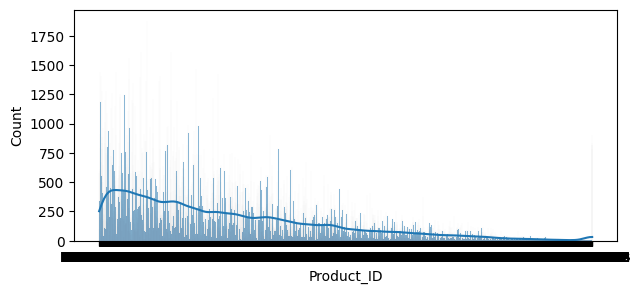

In [110]:
plt.figure(figsize = (7, 3))
sns.histplot(data = walmart, x = 'Product_ID', kde = True)
plt.show()

In [111]:
# Creating a function to find outliers using IQR for ALL columns

def find_outliers_IQR(walmart, column_name):
    q1 = walmart[column_name].quantile(0.25)
    q3 = walmart[column_name].quantile(0.75)
    IQR = q3 - q1
    outliers = walmart[((walmart[column_name] < (q1 - 1.5 * IQR)) | (walmart[column_name] > (q3 + 1.5 * IQR)))]
    return outliers

outliers = find_outliers_IQR(walmart, "Purchase")

print("Number of outliers: " + str(len(outliers)))
print('------------------------------------------------------------')
print("Max outlier value: " + str(outliers.max()))
print('------------------------------------------------------------')
print("Min outlier value: " + str(outliers.min()))

Number of outliers: 2677
------------------------------------------------------------
Max outlier value: User_ID                         1006040
Product_ID                    P00368842
Gender                                M
Age                                 55+
Occupation                           20
City_Category                         C
Stay_In_Current_City_Years           4+
Marital_Status                        1
Product_Category                     15
Purchase                          23961
dtype: object
------------------------------------------------------------
Min outlier value: User_ID                         1000017
Product_ID                    P00007542
Gender                                F
Age                                0-17
Occupation                            0
City_Category                         A
Stay_In_Current_City_Years            0
Marital_Status                        0
Product_Category                      9
Purchase                          21401
d

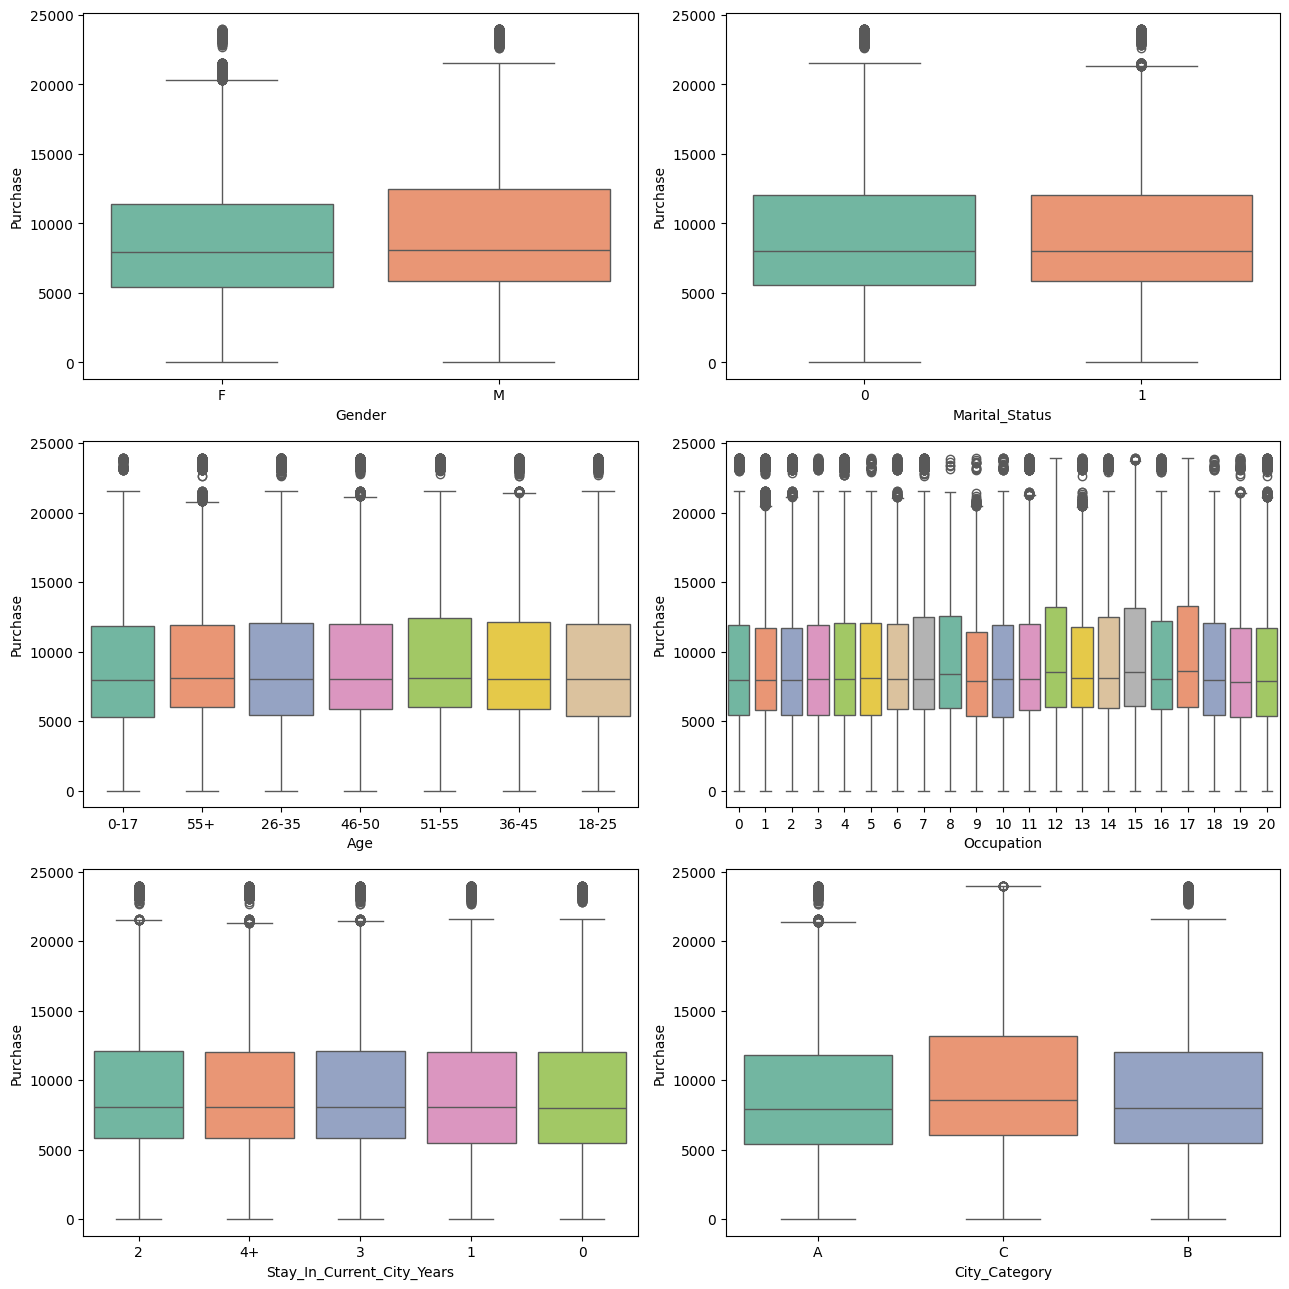

In [112]:
palette = "Set2"
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 13))
sns.boxplot(data=walmart, x="Gender", y="Purchase", ax=axs[0, 0], palette=palette)
sns.boxplot(data=walmart, y='Purchase', x='Marital_Status', ax=axs[0, 1], palette=palette)
sns.boxplot(data=walmart, y='Purchase', x='Age', ax=axs[1, 0], palette=palette)
sns.boxplot(data=walmart, y='Purchase', x='Occupation', ax=axs[1, 1], palette=palette)
sns.boxplot(data=walmart, y='Purchase', x='Stay_In_Current_City_Years', ax=axs[2, 0], palette=palette)
sns.boxplot(data=walmart, y='Purchase', x='City_Category', ax=axs[2, 1], palette=palette)

plt.tight_layout()
plt.show()

# <font color = 'purple'>2 Non-Graphical Analysis: Value counts and unique attributes:</font>

In [113]:
for column in walmart.columns:
    print(f"Value counts for column '{column}':")
    print(walmart[column].value_counts())
    print("\n")

Value counts for column 'User_ID':
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64


Value counts for column 'Product_ID':
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64


Value counts for column 'Gender':
Gender
M    414259
F    135809
Name: count, dtype: int64


Value counts for column 'Age':
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64


Value counts for column 'Occupation':
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3

In [114]:
for column in walmart.columns:
   print(f"Unique Count of {column} : {walmart[column].nunique()}")

print("*************************************************************************************************")

for column in walmart.columns:
   print(f"Unique values present in {column} -------  {walmart[column].unique()}")
print("*************************************************************************************************")

col_category = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
(walmart[col_category].melt().groupby(['variable', 'value'])[['value']].count().rename(columns={'value': 'Count(%)'}) / len(walmart)) * 100


Unique Count of User_ID : 5891
Unique Count of Product_ID : 3631
Unique Count of Gender : 2
Unique Count of Age : 7
Unique Count of Occupation : 21
Unique Count of City_Category : 3
Unique Count of Stay_In_Current_City_Years : 5
Unique Count of Marital_Status : 2
Unique Count of Product_Category : 20
Unique Count of Purchase : 18105
*************************************************************************************************
Unique values present in User_ID -------  [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Unique values present in Product_ID -------  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Unique values present in Gender -------  ['F' 'M']
Unique values present in Age -------  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Unique values present in Occupation -------  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Unique values present in City_Category -------  ['A' 'C' 'B']
Unique values present in Stay_I

Count(%)
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

# <font color = 'purple'>**3.Visual Analysis - Univariate,Bivariate,Multivariate**</font>

## <b><font color = 'purple'> Univariate </b></font>

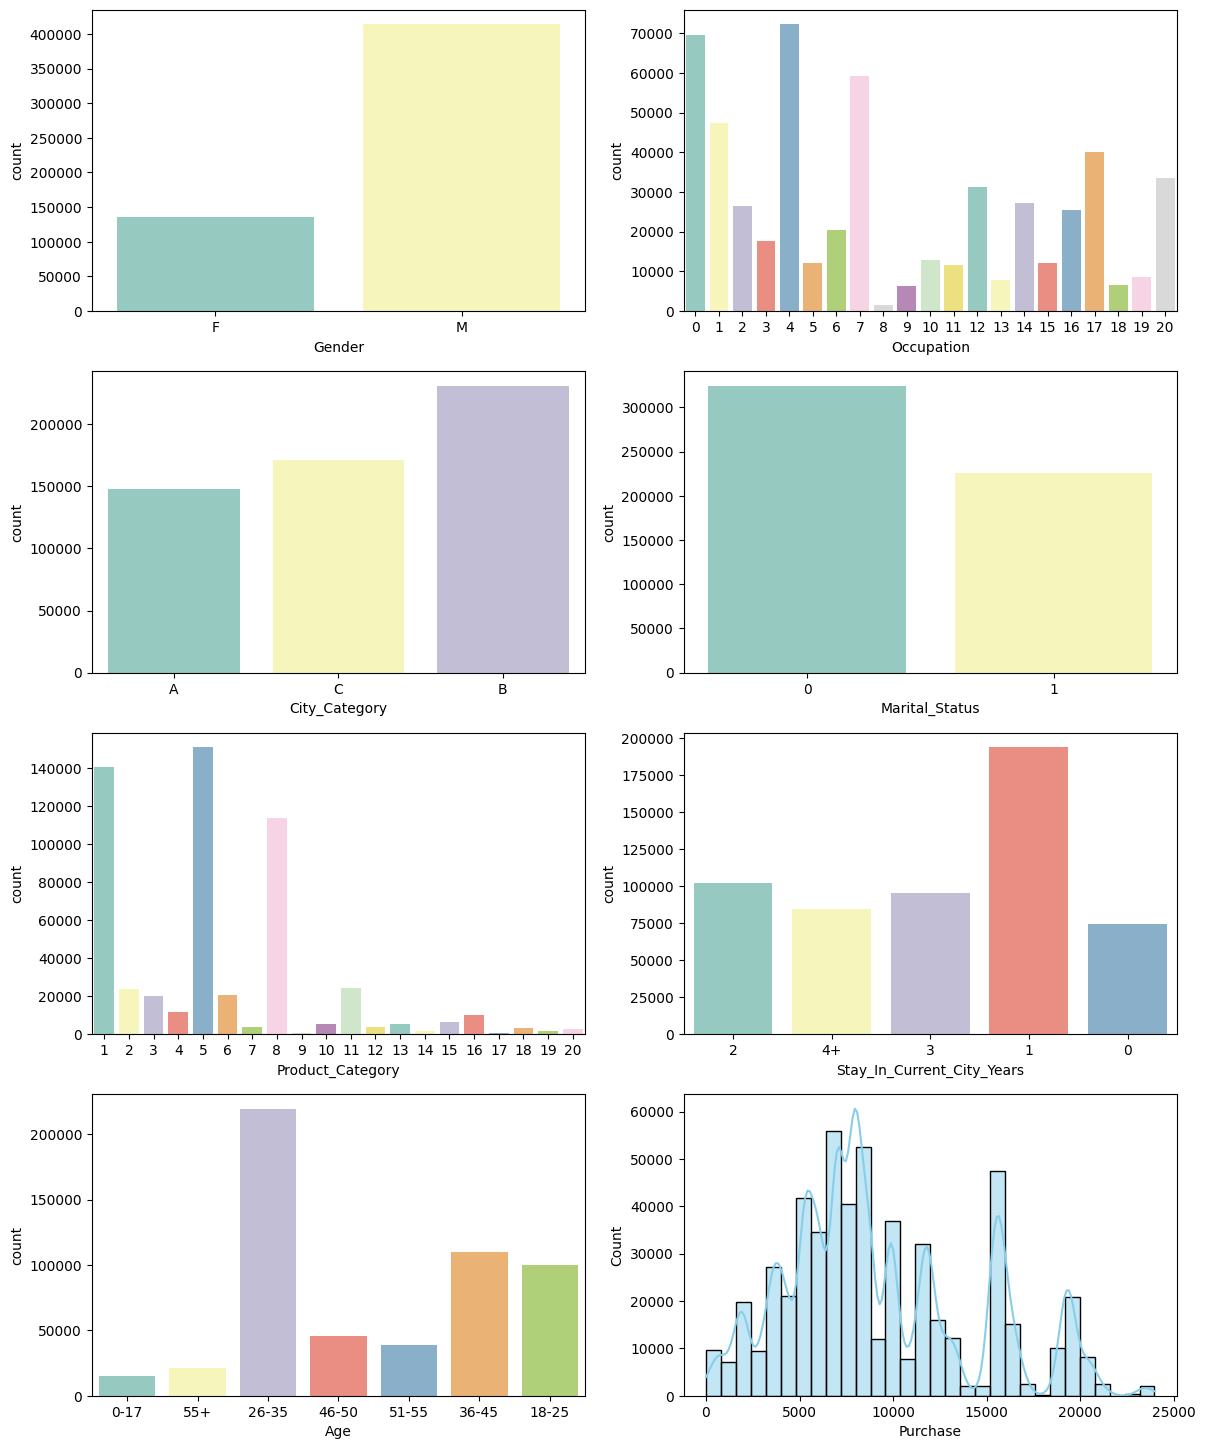

In [115]:
palette = "Set3"
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
sns.countplot(data=walmart, x='Gender', ax=axs[0,0],palette=palette)
sns.countplot(data=walmart, x='Occupation', ax=axs[0,1],palette=palette)
sns.countplot(data=walmart, x='City_Category', ax=axs[1,0],palette=palette)
sns.countplot(data=walmart, x='Marital_Status', ax=axs[1,1],palette=palette)
sns.countplot(data=walmart, x='Product_Category', ax=axs[2,0],palette=palette)
sns.countplot(data=walmart, x='Stay_In_Current_City_Years', ax=axs[2,1],palette=palette)
sns.countplot(data=walmart, x='Age', ax=axs[3,0],palette=palette)
sns.histplot(data=walmart, x='Purchase', bins= 30, ax=axs[3,1],color='skyblue',kde = True)
plt.show()

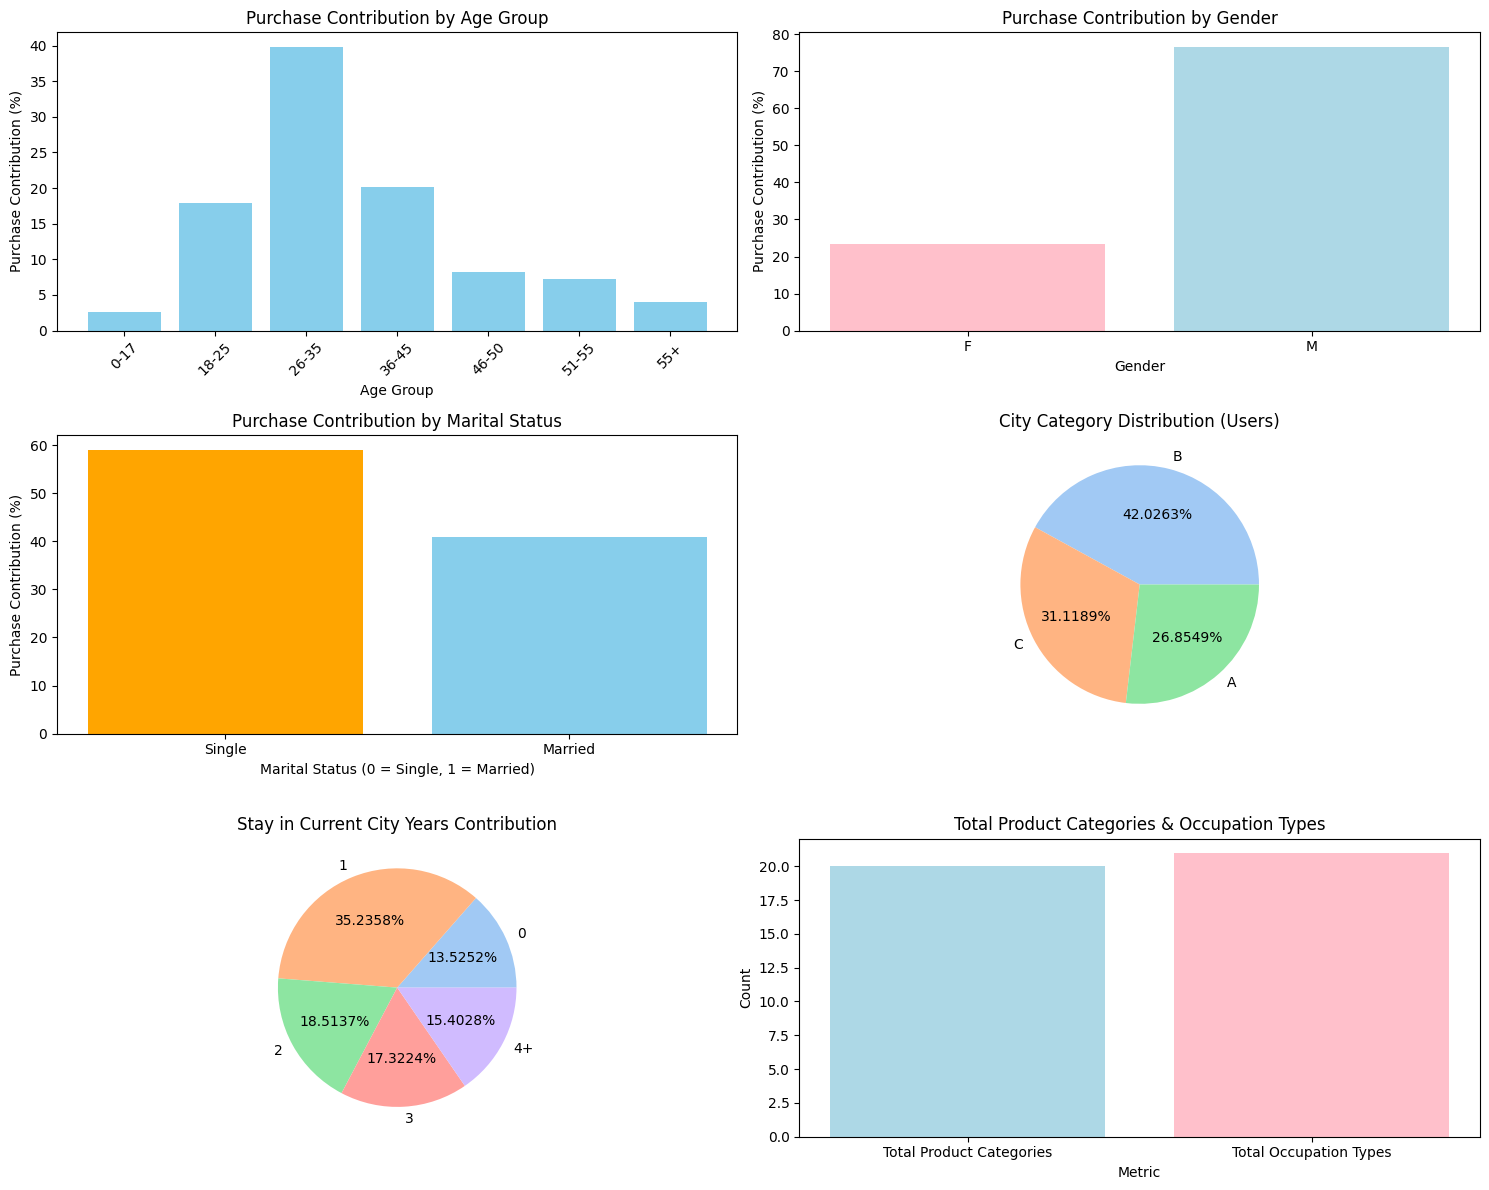

{'Age Group Contribution':      Age  Purchase Contribution (%)
 0   0-17                   2.647530
 1  18-25                  17.933325
 2  26-35                  39.871374
 3  36-45                  20.145361
 4  46-50                   8.258612
 5  51-55                   7.203947
 6    55+                   3.939850,
 'Gender Contribution':   Gender  Purchase Contribution (%)
 0      F                  23.278576
 1      M                  76.721424,
 'Marital Status Contribution':    Marital_Status  Purchase Contribution (%)
 0               0                  59.047057
 1               1                  40.952943,
 'Stay in City Contribution':   Stay_In_Current_City_Years  Customer Contribution (%)
 0                          0                  13.525237
 1                          1                  35.235825
 2                          2                  18.513711
 3                          3                  17.322404
 4                         4+                  15.402823,


In [116]:
# Age Group Contribution to Purchases
age_distribution = walmart.groupby("Age")["Purchase"].sum()
age_percentage = (age_distribution / age_distribution.sum()) * 100
wal_age = age_percentage.reset_index(name="Purchase Contribution (%)")

# Gender Contribution to Purchases
gender_distribution = walmart.groupby("Gender")["Purchase"].sum()
gender_percentage = (gender_distribution / gender_distribution.sum()) * 100
wal_gender = gender_percentage.reset_index(name="Purchase Contribution (%)")

# Marital Status Contribution
marital_distribution = walmart.groupby("Marital_Status")["Purchase"].sum()
marital_percentage = (marital_distribution / marital_distribution.sum()) * 100
wal_marital = marital_percentage.reset_index(name="Purchase Contribution (%)")

# Stay in Current City Years Contribution
stay_distribution = walmart.groupby("Stay_In_Current_City_Years")["User_ID"].count()
stay_percentage = (stay_distribution / stay_distribution.sum()) * 100
wal_stay = stay_percentage.reset_index(name="Customer Contribution (%)")

# City Category Contribution
city_distribution = walmart["City_Category"].value_counts(normalize=True) * 100
city_purchase_distribution = walmart.groupby("City_Category")["Purchase"].sum()
city_purchase_percentage = (city_purchase_distribution / city_purchase_distribution.sum()) * 100
wal_city = pd.DataFrame({
    "City Category": city_distribution.index,
    "User Contribution (%)": city_distribution.values,
    "Purchase Contribution (%)": city_purchase_percentage.values
})

# Total Product Categories & Occupation Types
num_product_categories = walmart["Product_Category"].nunique()
num_occupations = walmart["Occupation"].nunique()
wal_summary = pd.DataFrame({
    "Metric": ["Total Product Categories", "Total Occupation Types"],
    "Count": [num_product_categories, num_occupations]
})

# Visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Bar chart - Purchase Contribution by Age Group
axes[0, 0].bar(wal_age["Age"], wal_age["Purchase Contribution (%)"], color="skyblue")
axes[0, 0].set_title("Purchase Contribution by Age Group")
axes[0, 0].set_xlabel("Age Group")
axes[0, 0].set_ylabel("Purchase Contribution (%)")
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart - Purchase Contribution by Gender
axes[0, 1].bar(wal_gender["Gender"], wal_gender["Purchase Contribution (%)"], color=["pink", "lightblue"])
axes[0, 1].set_title("Purchase Contribution by Gender")
axes[0, 1].set_xlabel("Gender")
axes[0, 1].set_ylabel("Purchase Contribution (%)")

# Bar chart - Purchase Contribution by Marital Status
axes[1, 0].bar(wal_marital["Marital_Status"], wal_marital["Purchase Contribution (%)"], color=["orange", "skyblue"])
axes[1, 0].set_title("Purchase Contribution by Marital Status")
axes[1, 0].set_xlabel("Marital Status (0 = Single, 1 = Married)")
axes[1, 0].set_ylabel("Purchase Contribution (%)")
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(["Single", "Married"])

# Pie chart - City Category Distribution
palette_color = sns.color_palette('pastel')
axes[1, 1].pie(wal_city["User Contribution (%)"], labels=wal_city["City Category"], autopct="%1.4f%%", colors=palette_color)
axes[1, 1].set_title("City Category Distribution (Users)")

# Pie chart - Stay in Current City Years Contribution
palette_color = sns.color_palette('pastel')
axes[2, 0].pie(wal_stay["Customer Contribution (%)"], labels=wal_stay["Stay_In_Current_City_Years"], autopct="%1.4f%%", colors=palette_color)
axes[2, 0].set_title("Stay in Current City Years Contribution")

# Bar chart - Total Product Categories & Occupation Types
axes[2, 1].bar(wal_summary["Metric"], wal_summary["Count"], color=["lightblue",'pink'])
axes[2, 1].set_title("Total Product Categories & Occupation Types")
axes[2, 1].set_xlabel("Metric")
axes[2, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Display DataFrames
wal_outputs = {
    "Age Group Contribution": wal_age,
    "Gender Contribution": wal_gender,
    "Marital Status Contribution": wal_marital,
    "Stay in City Contribution": wal_stay,
    "City Category Contribution": wal_city,
    "Summary": wal_summary
}
wal_outputs

**Observations:**
1. <b>About 40% of the purchases are done by the age group 26-35, 18% by the age group 18-45, 20% by the age group 36-45, also being the top 3 contributing age groups</b>
2. <b>About 75%  purchases are done by the Male customers and about 25% by the Female customers</b>
3. <b>About 59% Single and 41% Married customers contribute to the total purchases made</b>
4. <b>13.5% of the customers are staying in city for less than a year,<br>
 35% for 1 year,<br>
 18% for 2 years,<br>
 17% for 3 years and<br>
 15% for more than 4 years </b>
5. <b>53% of the users belongs to city category C whereas, 29% to category B and 18% belong to category A. combining from the previous observation, category B purchase count is 42% and category C purchase counts is 31%.</b>
6. <b>We can clearly see category B are more actively purchasing inspite of the fact they are only 29% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.</b>
7. <b>There are 20 product categories in total</b>
8. <b>There are 21 different types of occupations in the city </b>


**Business Insights:**
1. **Focus advertisements and offers on the 26-35 age group.**
2. **Stock more of the best-selling products.**

## <b><font color = 'purple'> Bivariate </b></font>

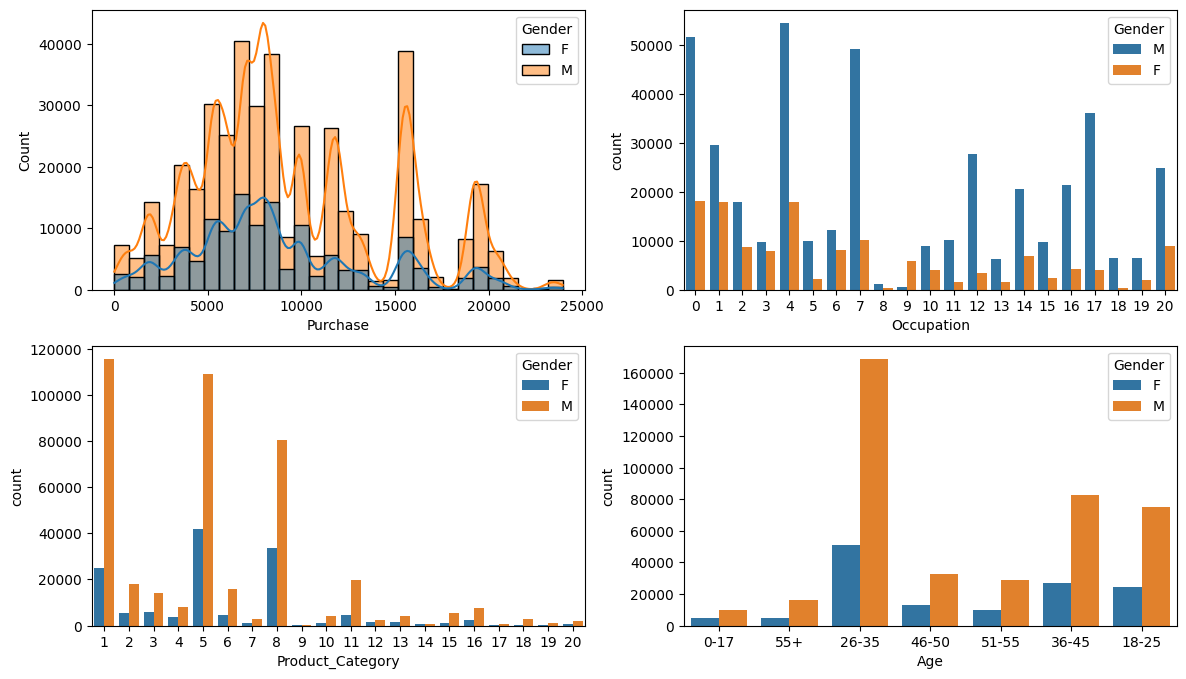

In [117]:
fig, axs = plt.subplots(2,2,figsize =(14, 8))
sns.histplot(data = walmart, x ="Purchase", hue ="Gender", bins =30, ax=axs[0,0],kde = True)
sns.countplot(data = walmart, x = "Occupation", hue = "Gender", ax = axs[0,1])
sns.countplot(data = walmart,x = "Product_Category",hue ="Gender", ax = axs[1,0])
sns.countplot(data = walmart,x = walmart["Age"],hue = walmart["Gender"],ax = axs[1,1])
plt.show()

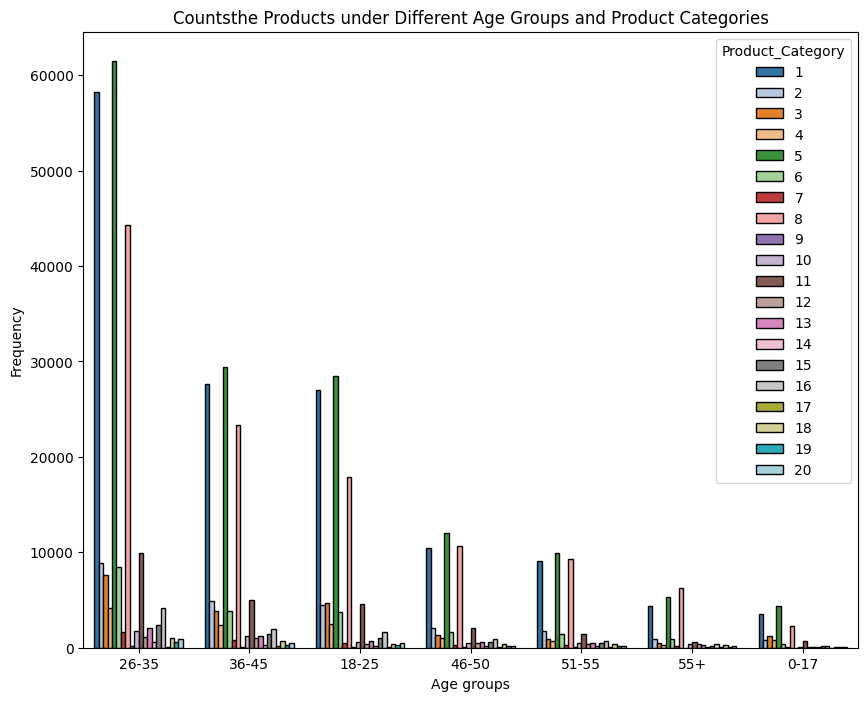

In [118]:
countproducts_of_agegroup = walmart.groupby(["Age", "Product_Category"]).size()
countproducts_of_agegroup = countproducts_of_agegroup.sort_values(ascending = False).reset_index(name = "Count")

plt.figure(figsize = (10, 8))
sns.barplot(data = countproducts_of_agegroup, x = "Age", y = "Count",
             hue = "Product_Category", palette = 'tab20', edgecolor='black')
plt.title("Countsthe Products under Different Age Groups and Product Categories")
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.show()

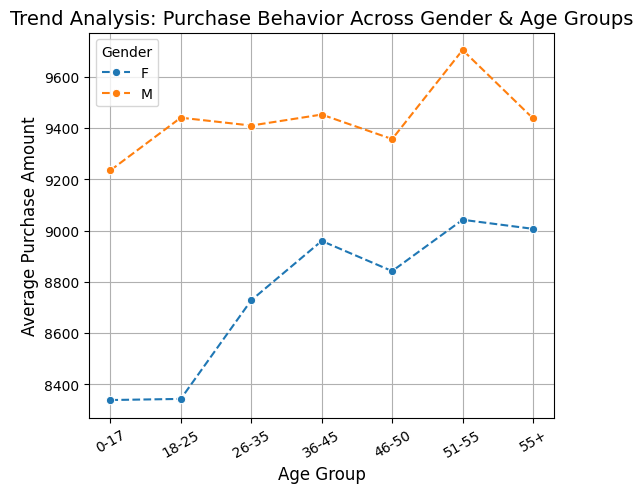

In [119]:
# Compute mean purchase amount per gender and age group
gender_age_purchase_trend = walmart.groupby(["Age", "Gender"])["Purchase"].mean().reset_index()

# Plot purchase trend
plt.figure(figsize=(6, 5))
sns.lineplot(data=gender_age_purchase_trend, x="Age", y="Purchase", hue="Gender", marker="o", linestyle="--")

# Customizing plot
plt.title("Trend Analysis: Purchase Behavior Across Gender & Age Groups", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Purchase Amount", fontsize=12)
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.legend(title="Gender")
plt.grid(True)

# Show plot
plt.show()

**Observations:**
1. **Age 26-35 can be observed as a dominant buyer group:contributing the most to purchases.**
2. **from this we can say that Males spend more than females, but variance in purchases exists.**
3. **Married individuals spend more likely due to family expenses.**
4. **Customers in City B have the highest purchase contribution.**
5. **Recent city movers have stayed for 1-3 years and tend to spend more.**
6. **Occupations influence spending patterns, with some professions having significantly higher spending.**
7. **Certain product categories are of age-specific, affecting sales trends.**


**Business Insights:**
1. **Develop personalized discounts for younger and older customers based on their spending trends.**
2. **Tailor promotions based on jobs (e.g., discounts on electronics for IT professionals).**

## <b><font color = 'purple'>Multivariate Analysis:</font></b>

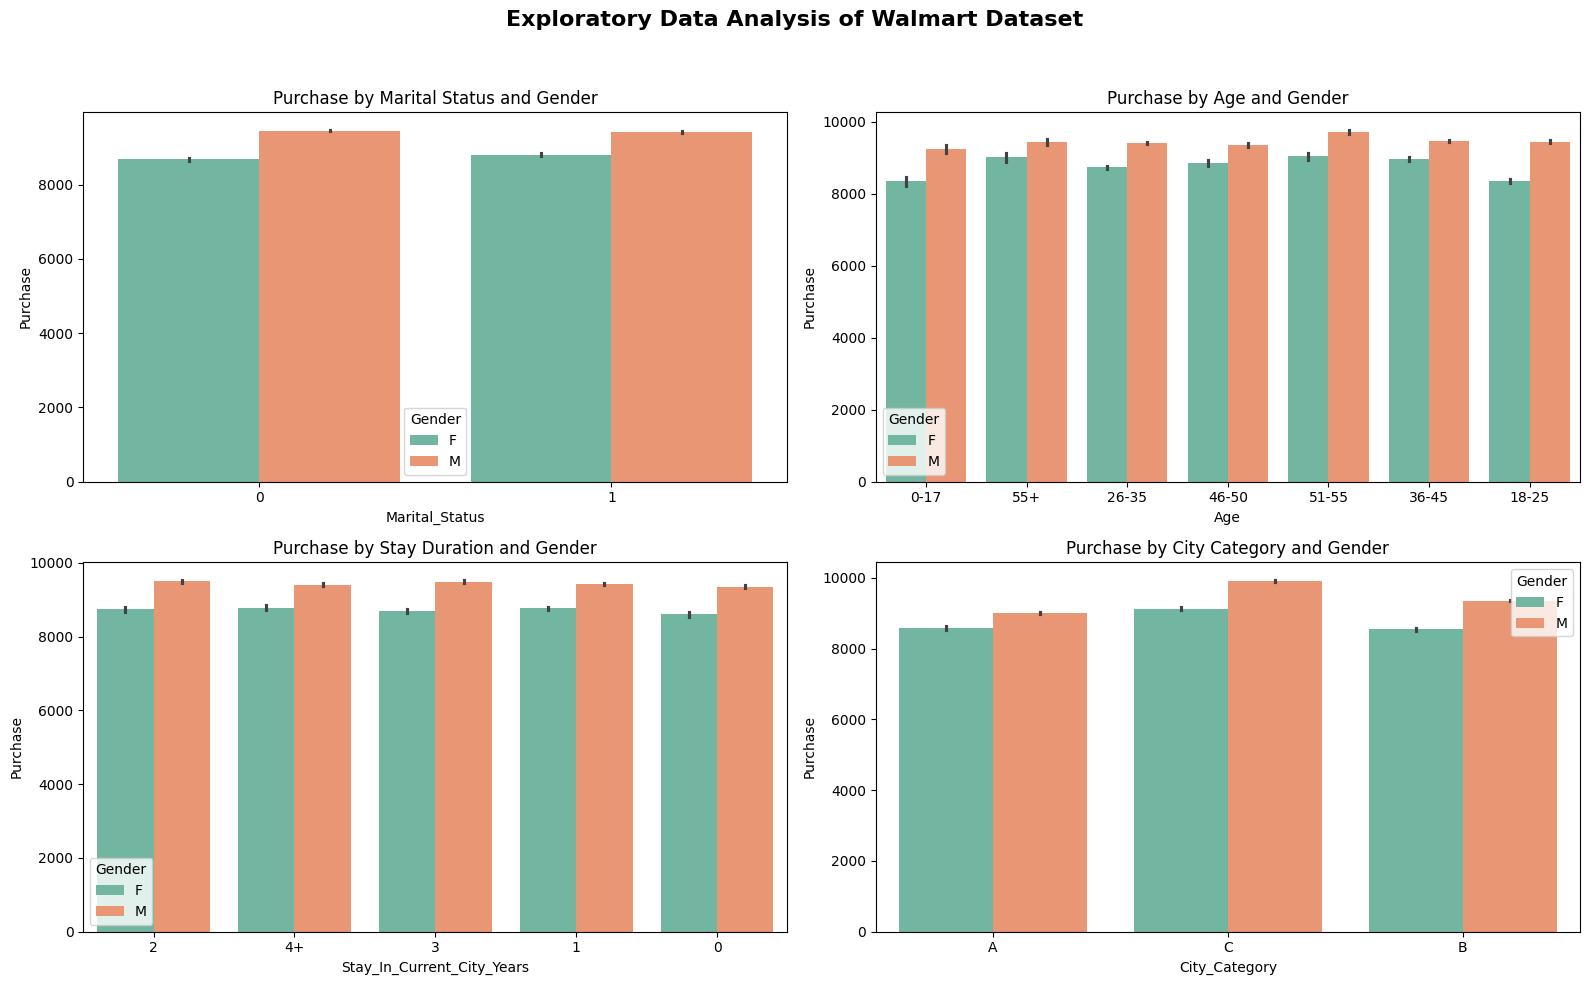

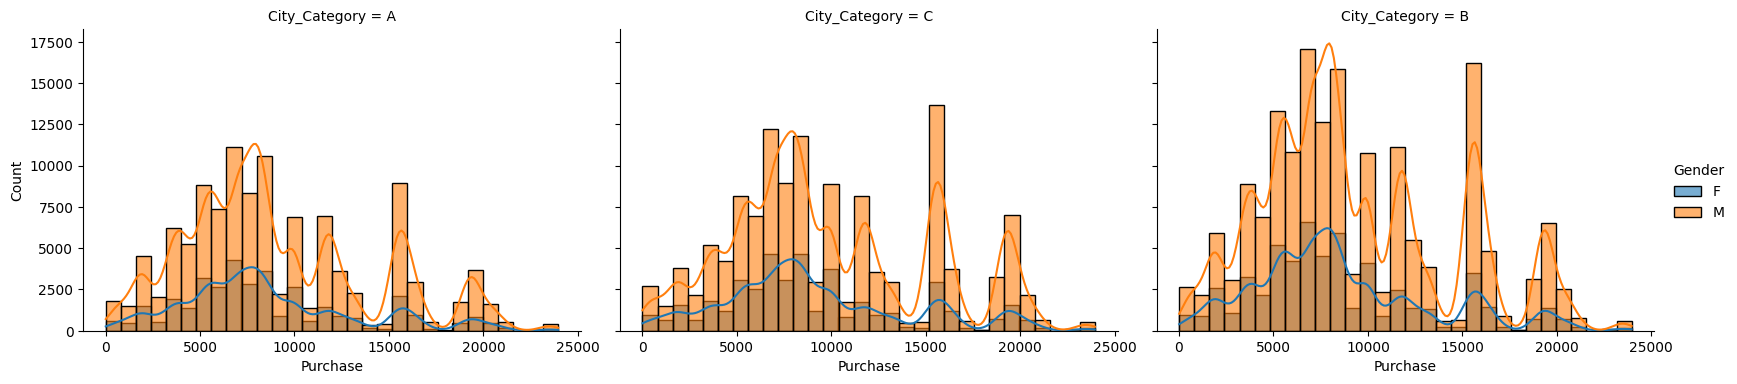

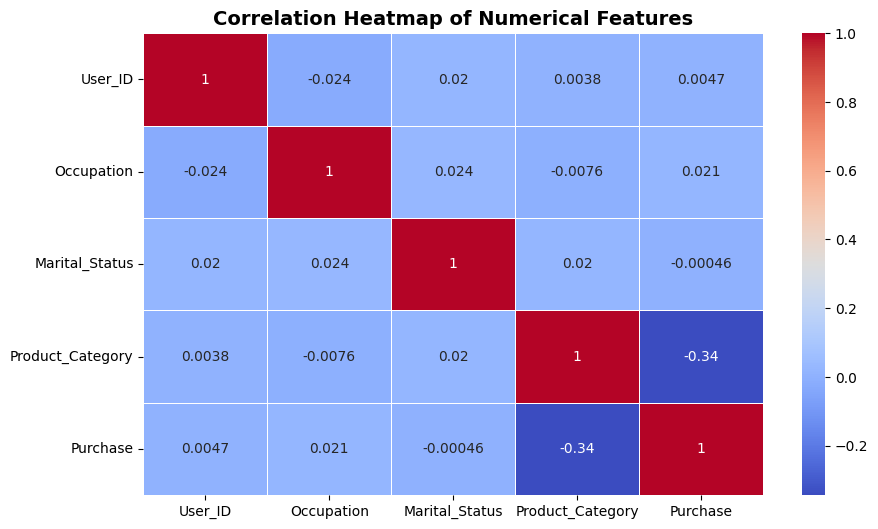

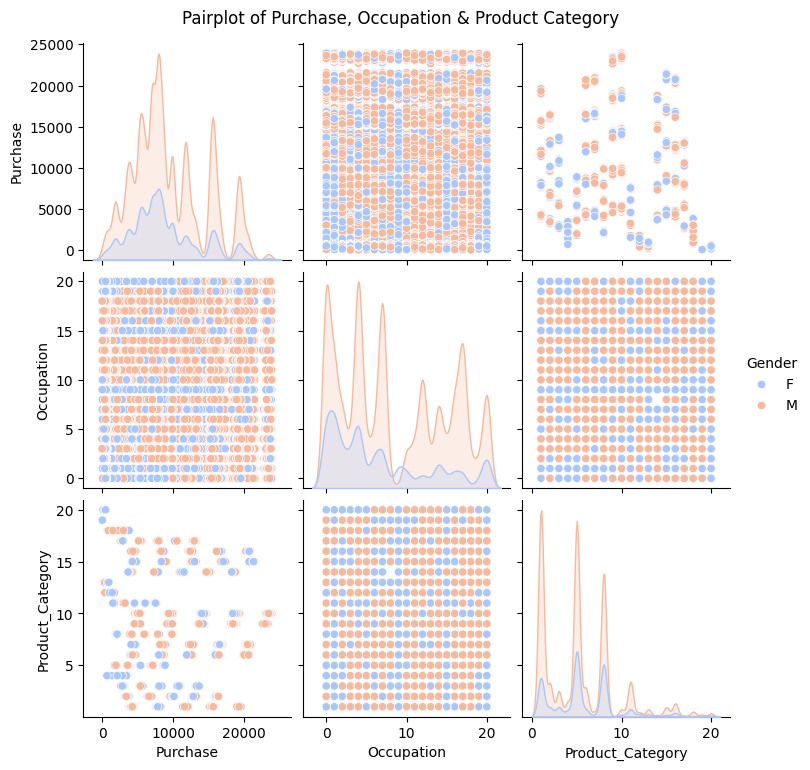

In [120]:
palette = "Set2"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle("Exploratory Data Analysis of Walmart Dataset", fontsize=16, fontweight="bold")
sns.barplot(data=walmart, y="Purchase", x="Marital_Status", hue="Gender", ax=axes[0, 0], palette=palette)
axes[0, 0].set_title("Purchase by Marital Status and Gender")
sns.barplot(data=walmart, y="Purchase", x="Age", hue="Gender", ax=axes[0, 1], palette=palette)
axes[0, 1].set_title("Purchase by Age and Gender")
sns.barplot(data=walmart, y="Purchase", x="Stay_In_Current_City_Years", hue="Gender", ax=axes[1, 0], palette=palette)
axes[1, 0].set_title("Purchase by Stay Duration and Gender")

sns.barplot(data=walmart, y="Purchase", x="City_Category", hue="Gender", ax=axes[1, 1], palette=palette)
axes[1, 1].set_title("Purchase by City Category and Gender")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Face grid
g = sns.FacetGrid(walmart, col="City_Category", hue="Gender", height=4, aspect=1.4)
g.map(sns.histplot, "Purchase", bins=30, kde=True, alpha=0.6)
g.add_legend()
plt.subplots_adjust(top=0.9)
plt.show()

# Correlation
numerical_features = walmart.select_dtypes(include=["number"])
correlation_matrix = numerical_features.corr()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidth=0.4, ax=ax)
ax.set_title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")
plt.show()

# Pairplot
num_cols = ["Purchase", "Occupation", "Product_Category"]
sns.pairplot(walmart[num_cols + ["Gender"]], hue="Gender", palette="coolwarm", diag_kind="kde")
plt.suptitle("Pairplot of Purchase, Occupation & Product Category", y=1.02)
plt.show()


**Observations:**
1. **Males aged 26-35 in City B are the highest spenders, making them an important target segment.**
2. **Product preferences vary significantly by age ,meant that personalized marketing is crucial.**
3. **City B has the largest customer base, but City C customers spend more.**
4. **Occupation strongly influences product category preferences, suggesting for a role-based marketing.**
5. **Recent movers spend the most (1-3 years stay) , making them the key targets for marketing efforts.**
6. **City A has the most balanced gender shopping pattern,compared to  City B & C ,are male-dominated.**

   
**Business Insights:**
1. **Focus digital ads & discounts on high-spending demographic groups here we have males aged 26-35 in City B).**
2. **Offer premium product promotions in City C**
3. **budget-friendly product campaigns in City A.**
4. **Improve customer retention for 1-3 year stayers by offering loyalty programs.**

# <b><font color='blue'>Question1:    Are women spending more money per transaction than men? Why or Why not?</font></b>

In [121]:
def bootstrap_CI(data, bootstrap_samples, sample_size, alpha):
    boot_means = []
    for _ in range(bootstrap_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        boot_means.append(np.mean(sample))
    lowerbound = np.percentile(boot_means, 100 * alpha / 2)
    upperbound = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lowerbound, upperbound

In [122]:
# Filter the data for female and male customers
wal_female= walmart.loc[walmart["Gender"]=='F',["Purchase"]]
wal_male = walmart.loc[walmart["Gender"]=='M',["Purchase"]]

# Calculate average spending per transaction for female and male customers
avg_female_spending = round((wal_female['Purchase'].mean()),2)
avg_male_spending = round((wal_male['Purchase'].mean()),2)

print("Average spending per transaction for female customers:", avg_female_spending)
print('---------------------------------------------------------------')
print("Average spending per transaction for male customers:", avg_male_spending)
print('---------------------------------------------------------------')
male_std = np.std(wal_male['Purchase'])
print("Population male SD:",male_std)
print('---------------------------------------------------------------')
female_std = np.std(wal_female['Purchase'])
print("Population female SD:",female_std)
print('---------------------------------------------------------------')

if avg_female_spending > avg_male_spending:
    print("Yes, women are spending more money per transaction than men.")
elif avg_female_spending < avg_male_spending:
    print("No, men are spending more money per transaction than women.")
else:
    print("There is no significant difference in spending per transaction between men and women.")

Average spending per transaction for female customers: 8734.57
---------------------------------------------------------------
Average spending per transaction for male customers: 9437.53
---------------------------------------------------------------
Population male SD: 5092.180063635943
---------------------------------------------------------------
Population female SD: 4767.215738016988
---------------------------------------------------------------
No, men are spending more money per transaction than women.


## <b><font color = 'blue'>Question2: Confidence intervals and distribution of the mean of the expenses by female and male customers</font></b>

In [123]:
# Define sample sizes and parameters
sample_sizes = [300, 3000, 30000]
iterations = 10000
alpha = 0.05
cis_data = []
wal_male_spending = wal_male["Purchase"].values
wal_female_spending = wal_female["Purchase"].values
for gender, data in {'Male': wal_male_spending, 'Female': wal_female_spending}.items():
    print(f"\nConfidence Intervals for Gender: {gender}")
    for size in sample_sizes:
        ci = bootstrap_CI(data, iterations, size, alpha)
        print(f"Size: {size}, CI: {ci}")
        cis_data.append({
            'Sample Size': size,
            'Gender': gender,
            'Lowerbound': ci[0],
            'Upperbound': ci[1]
        })
# Convert to DataFrame
cis_df = pd.DataFrame(cis_data)
print("\n<------ Confidence Interval at 95% for Male and Female --------->")
print(cis_df)


Confidence Intervals for Gender: Male
Size: 300, CI: (8868.739333333333, 10022.74)
Size: 3000, CI: (9257.064533333332, 9615.778258333332)
Size: 30000, CI: (9380.484447499999, 9494.527672499999)

Confidence Intervals for Gender: Female
Size: 300, CI: (8205.608416666668, 9279.190083333333)
Size: 3000, CI: (8564.082433333333, 8902.31755)
Size: 30000, CI: (8680.610245, 8788.283253333335)

<------ Confidence Interval at 95% for Male and Female --------->
   Sample Size  Gender   Lowerbound    Upperbound
0          300    Male  8868.739333  10022.740000
1         3000    Male  9257.064533   9615.778258
2        30000    Male  9380.484447   9494.527672
3          300  Female  8205.608417   9279.190083
4         3000  Female  8564.082433   8902.317550
5        30000  Female  8680.610245   8788.283253


In [124]:
from statsmodels.stats import weightstats as stests
alpha = 0.05
z_stat, p_value = stests.ztest(wal_male_spending, wal_female_spending, value = 0, alternative = 'larger')
print("z_stat:", z_stat, ",", "p_value:", p_value)
print("<----------------------------------------->")
if p_value < alpha:
 print("reject the null hypothesis : There was higher mean purchases of males than females.")
else:
 print("unable to reject null hypothesis : There was higher mean female purchases than males.")


z_stat: 44.837957934353966 , p_value: 0.0
<----------------------------------------->
reject the null hypothesis : There was higher mean purchases of males than females.


## <b><font color = 'blue'>Question3:  Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? </font></b>

In [125]:
print("\n<------ Overlap --------->")
overlap_results = []
for sample in sample_sizes:
    male_ci = cis_df[(cis_df["Gender"] == "Male") & (cis_df["Sample Size"] == sample)]
    female_ci = cis_df[(cis_df["Gender"] == "Female") & (cis_df["Sample Size"] == sample)]

    male_lower, male_upper = male_ci["Lowerbound"].values[0], male_ci["Upperbound"].values[0]
    female_lower, female_upper = female_ci["Lowerbound"].values[0], female_ci["Upperbound"].values[0]

    # Check for overlap
    overlap = max(male_lower, female_lower) <= min(male_upper, female_upper)

    print(f"Sample Size: {sample}")
    print(f"  Male CI: ({male_lower}, {male_upper})")
    print(f"  Female CI: ({female_lower}, {female_upper})")
    print(f"  Overlap: {'YES' if overlap else 'NO'}\n")

    overlap_results.append({
        "Sample Size": sample,
        "Male CI": (male_lower, male_upper),
        "Female CI": (female_lower, female_upper),
        "Overlap": overlap
    })

# Convert overlap results to DataFrame and display
overlap_df = pd.DataFrame(overlap_results)
print(overlap_df)



<------ Overlap --------->
Sample Size: 300
  Male CI: (8868.739333333333, 10022.74)
  Female CI: (8205.608416666668, 9279.190083333333)
  Overlap: YES

Sample Size: 3000
  Male CI: (9257.064533333332, 9615.778258333332)
  Female CI: (8564.082433333333, 8902.31755)
  Overlap: NO

Sample Size: 30000
  Male CI: (9380.484447499999, 9494.527672499999)
  Female CI: (8680.610245, 8788.283253333335)
  Overlap: NO

   Sample Size                                 Male CI  \
0          300           (8868.739333333333, 10022.74)   
1         3000  (9257.064533333332, 9615.778258333332)   
2        30000  (9380.484447499999, 9494.527672499999)   

                                Female CI  Overlap  
0  (8205.608416666668, 9279.190083333333)     True  
1         (8564.082433333333, 8902.31755)    False  
2        (8680.610245, 8788.283253333335)    False  


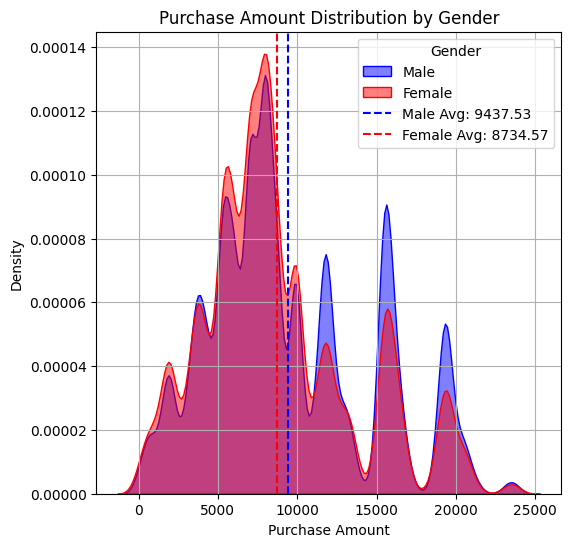

In [126]:
plt.figure(figsize=(6, 6))
sns.kdeplot(wal_male["Purchase"], label="Male", fill=True, alpha=0.5, color="blue")
sns.kdeplot(wal_female["Purchase"], label="Female", fill=True, alpha=0.5, color="red")
# Mark the average spending for both genders
plt.axvline(avg_male_spending, color="blue", linestyle="dashed", label=f"Male Avg: {avg_male_spending}")
plt.axvline(avg_female_spending, color="red", linestyle="dashed", label=f"Female Avg: {avg_female_spending}")
plt.title("Purchase Amount Distribution by Gender")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend(title="Gender")
plt.grid(True)
plt.show()


**Observations:**
1. As the sample size increases from 300 to 30,000, the confidence intervals (CIs) narrow down, indicating a more precise estimate of the mean purchase amount for both males and females.
2. **Overlap Between Male and Female CIs:**
   > 1. If the confidence intervals for male and female purchases overlap significantly, this suggests that there is no significant difference in purchasing behavior between genders.
   > 2. If there is minimal or no overlap, it could indicate a notable difference in spending habits between males and females.

**Central Limit Theorem in Action:**
1. Larger sample sizes make the sampling distribution closer to normal, reducing variance and tightening the CIs.
2. The gap between intervals becomes smaller as more data points contribute to the estimated mean.
3. If male and female spending CIs are far apart at all sample sizes, it suggests consistent differences in purchasing behavior.
4. If differences fluctuate based on sample size, the difference might not be statistically strong.

# <b><font color='blue'>Question4:   Are married individuals spending more money per transaction than unmarried individuals? Why or why not?  </font></b>

In [127]:
married_spending = walmart.loc[walmart["Marital_Status"] == 1, ["Purchase"]]
unmarried_spending = walmart.loc[walmart["Marital_Status"] == 0, ["Purchase"]]

# Calculate average spending per transaction for married and unmarried customers
avg_married_spending = round((married_spending['Purchase'].mean()), 2)
avg_unmarried_spending = round((unmarried_spending['Purchase'].mean()), 2)

print("Average spending per transaction for married customers:", avg_married_spending)
print('---------------------------------------------------------------')
print("Average spending per transaction for unmarried customers:", avg_unmarried_spending)
print('---------------------------------------------------------------')

# Compute standard deviation for both groups
married_std = np.std(married_spending['Purchase'])
print("Population Married SD:", married_std)
print('---------------------------------------------------------------')
unmarried_std = np.std(unmarried_spending['Purchase'])
print("Population Unmarried SD:", unmarried_std)
print('---------------------------------------------------------------')
# Compare spending habits
if avg_married_spending > avg_unmarried_spending:
    print("Yes, married customers are spending more per transaction than unmarried customers.")
elif avg_married_spending < avg_unmarried_spending:
    print("No, unmarried customers are spending more per transaction than married customers.")
else:
    print("There is no significant difference in spending per transaction between married and unmarried customers.")


Average spending per transaction for married customers: 9261.17
---------------------------------------------------------------
Average spending per transaction for unmarried customers: 9265.91
---------------------------------------------------------------
Population Married SD: 5016.886245793184
---------------------------------------------------------------
Population Unmarried SD: 5027.340117880186
---------------------------------------------------------------
No, unmarried customers are spending more per transaction than married customers.


In [128]:
alpha = 0.05
z_stat, p_value = stests.ztest(married_spending , unmarried_spending, value = 0, alternative = 'larger')
print("z_stat:", z_stat, ",", "p_value:", p_value)
print("<----------------------------------------->")
if p_value < alpha:
 print("reject the null hypothesis : There was higher mean purchases of non-married than married.")
else:
 print("unable to reject null hypothesis : There was higher mean married purchases than non-married.")

z_stat: [-0.34366981] , p_value: [0.63445269]
<----------------------------------------->
unable to reject null hypothesis : There was higher mean married purchases than non-married.


## <b><font color='blue'>Question5:   Analyze the confidence intervals and the distribution of the mean expenses for married and unmarried customers.  </font></b>

In [129]:
# Define sample sizes and parameters
sample_sizes = [300, 3000, 30000]
iterations = 10000
alpha = 0.05
cis_data = []

# Convert spending data to NumPy arrays
married_spending_values = married_spending["Purchase"].values
unmarried_spending_values = unmarried_spending["Purchase"].values

# Calculate confidence intervals
for status, data in {'Married': married_spending_values, 'Unmarried': unmarried_spending_values}.items():
    print(f"\nConfidence Intervals for {status}")
    for size in sample_sizes:
        ci = bootstrap_CI(data, iterations, size, alpha)
        print(f"Sample Size: {size}, CI: {ci}")
        cis_data.append({
            'Sample Size': size,
            'Marital Status': status,
            'Lowerbound': ci[0],
            'Upperbound': ci[1]
        })
# Convert to DataFrame
cis_df = pd.DataFrame(cis_data)
print("\n<------ Confidence Interval at 95% for Married and Unmarried --------->")
print(cis_df)


Confidence Intervals for Married
Sample Size: 300, CI: (8692.060083333334, 9825.82625)
Sample Size: 3000, CI: (9084.507525, 9440.262216666666)
Sample Size: 30000, CI: (9204.7468625, 9317.793751666668)

Confidence Intervals for Unmarried
Sample Size: 300, CI: (8706.063666666667, 9847.05775)
Sample Size: 3000, CI: (9089.354008333334, 9445.409658333332)
Sample Size: 30000, CI: (9207.853545, 9323.9664025)

<------ Confidence Interval at 95% for Married and Unmarried --------->
   Sample Size Marital Status   Lowerbound   Upperbound
0          300        Married  8692.060083  9825.826250
1         3000        Married  9084.507525  9440.262217
2        30000        Married  9204.746863  9317.793752
3          300      Unmarried  8706.063667  9847.057750
4         3000      Unmarried  9089.354008  9445.409658
5        30000      Unmarried  9207.853545  9323.966403


## <b><font color='blue'>Question6: Do the confidence intervals of average spending for married and unmarried individuals overlap? </b></font>

In [130]:
overlap_results = []
for size in sample_sizes:
    married_ci = cis_df[(cis_df["Marital Status"] == "Married") & (cis_df["Sample Size"] == size)]
    unmarried_ci = cis_df[(cis_df["Marital Status"] == "Unmarried") & (cis_df["Sample Size"] == size)]
    married_lower, married_upper = married_ci["Lowerbound"].values[0], married_ci["Upperbound"].values[0]
    unmarried_lower, unmarried_upper = unmarried_ci["Lowerbound"].values[0], unmarried_ci["Upperbound"].values[0]

    # Check for overlap
    overlap = max(married_lower, unmarried_lower) <= min(married_upper, unmarried_upper)

    print(f"\nSample Size: {size}")
    print(f"  Married CI: ({married_lower}, {married_upper})")
    print(f"  Unmarried CI: ({unmarried_lower}, {unmarried_upper})")
    print(f"  Overlap: {'Overlapping' if overlap else 'NOT Overlappinf'}\n")

    overlap_results.append({
        "Sample Size": size,
        "Married CI": (married_lower, married_upper),
        "Unmarried CI": (unmarried_lower, unmarried_upper),
        "Overlap": "Overlapping" if overlap else "No Overlap"
    })

# Convert overlap results to DataFrame and display
overlap_df = pd.DataFrame(overlap_results)
print(overlap_df)



Sample Size: 300
  Married CI: (8692.060083333334, 9825.82625)
  Unmarried CI: (8706.063666666667, 9847.05775)
  Overlap: Overlapping


Sample Size: 3000
  Married CI: (9084.507525, 9440.262216666666)
  Unmarried CI: (9089.354008333334, 9445.409658333332)
  Overlap: Overlapping


Sample Size: 30000
  Married CI: (9204.7468625, 9317.793751666668)
  Unmarried CI: (9207.853545, 9323.9664025)
  Overlap: Overlapping

   Sample Size                         Married CI  \
0          300    (8692.060083333334, 9825.82625)   
1         3000   (9084.507525, 9440.262216666666)   
2        30000  (9204.7468625, 9317.793751666668)   

                             Unmarried CI      Overlap  
0         (8706.063666666667, 9847.05775)  Overlapping  
1  (9089.354008333334, 9445.409658333332)  Overlapping  
2             (9207.853545, 9323.9664025)  Overlapping  


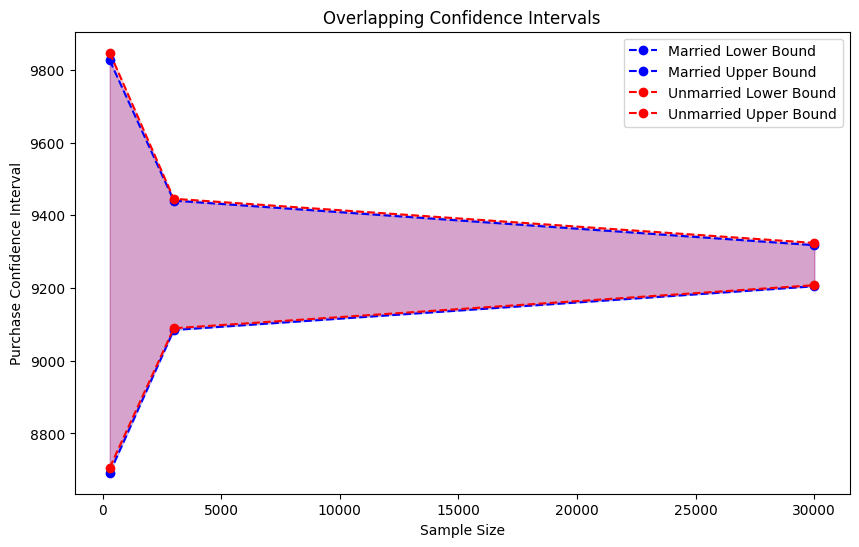

In [131]:
fig, ax = plt.subplots(figsize=(10, 6))
for status, color in zip(["Married", "Unmarried"], ["blue", "red"]):
    lower_bounds = [cis_df[(cis_df["Marital Status"] == status) & (cis_df["Sample Size"] == size)]["Lowerbound"].values[0] for size in sample_sizes]
    upper_bounds = [cis_df[(cis_df["Marital Status"] == status) & (cis_df["Sample Size"] == size)]["Upperbound"].values[0] for size in sample_sizes]
    ax.plot(sample_sizes, lower_bounds, marker='o', linestyle='dashed', color=color, label=f"{status} Lower Bound")
    ax.plot(sample_sizes, upper_bounds, marker='o', linestyle='dashed', color=color, label=f"{status} Upper Bound")
    ax.fill_between(sample_sizes, lower_bounds, upper_bounds, alpha=0.2, color=color)
ax.set_xlabel("Sample Size")
ax.set_ylabel("Purchase Confidence Interval")
ax.set_title("Overlapping Confidence Intervals")
ax.legend()
plt.show()

**Observations:**
1. The width of the confidence intervals did not significantly decrease as the sample size increased from 300 to 30,000.
2. The differences between the intervals for married and unmarried individuals remained consistent across all sample sizes.
3. At a sample size of 30,000, the interval stabilized around the 9000 range, suggesting a limit to how much the interval can shrink with larger samples.
4. Across all sample sizes (300, 3,000, and 30,000), the confidence intervals for married and unmarried individuals overlapped.
5. This indicates that there is no statistically significant difference in the purchasing behavior of married versus unmarried individuals.
6. There has been evidence of overlapping of married and non-married samples of mean purchases for all sample sizes of 300, 3000 and 30000. Thus, we can conclude that there was no significant difference of purchasing behaviour between the two groups.
   
**Central Limit Theorem in Action**
1. As the sample size increases, the sampling distribution of the sample mean approaches a normal distribution, regardless of the original population distribution.This is consistent with the Central Limit Theorem, meaning that larger samples provide more stable and symmetrical confidence intervals.
2. Even at smaller sample sizes, the difference between confidence intervals was minimal, reinforcing the idea that marital status has little to no impact on purchasing behavior.
3. This strong similarity suggests that targeted marketing strategies based on marital status may not be necessary, as both groups exhibit comparable spending habits.


# <b><font color='blue'>Question 7:  Which age group spends the most money per transaction? What factors might contribute to this trend?   </font></b>

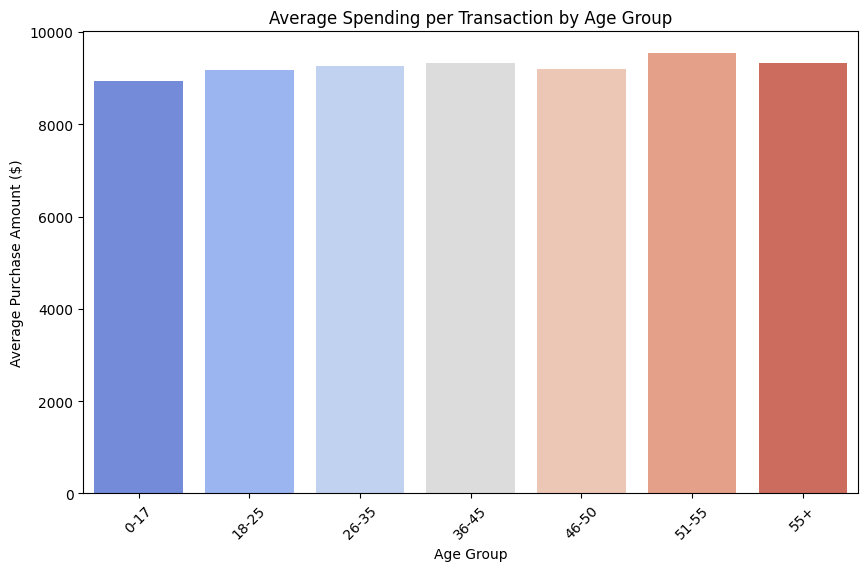

       Mean_Purchase     CI_Lower     CI_Upper
Age                                           
0-17     8933.464640  8851.941436  9014.987845
18-25    9169.663606  9138.407569  9200.919643
26-35    9252.690633  9231.733561  9273.647705
36-45    9331.350695  9301.669084  9361.032305
46-50    9208.625697  9163.083936  9254.167458
51-55    9534.808031  9483.989875  9585.626187
55+      9336.280459  9269.295064  9403.265855


In [132]:
# Age-Based Spending Analysis
age_groups = walmart.groupby("Age")["Purchase"]
age_means = age_groups.mean()
age_cis = age_groups.apply(lambda x: stats.t.interval(0.95, len(x)-1, loc=x.mean(), scale=stats.sem(x)))
# Convert CI tuples into separate columns
age_cis_df = pd.DataFrame(age_cis.tolist(), index=age_means.index, columns=["CI_Lower", "CI_Upper"])
# Merge with age_means
age_analysis = pd.DataFrame(age_means).rename(columns={"Purchase": "Mean_Purchase"}).join(age_cis_df)
plt.figure(figsize=(10, 6))
sns.barplot(x=age_analysis.index, y=age_analysis["Mean_Purchase"], palette="coolwarm")
plt.ylabel("Average Purchase Amount ($)")
plt.xlabel("Age Group")
plt.title("Average Spending per Transaction by Age Group")
plt.xticks(rotation=45)
plt.show()
print(age_analysis)


## <b><font color='blue'>Analyze the confidence intervals and the distribution of the mean expenses across different age groups. </b></font>

In [133]:
age_groups = {
    '0-17': walmart[walmart["Age"] == '0-17']["Purchase"].dropna().values,
    '18-25': walmart[walmart["Age"] == '18-25']["Purchase"].dropna().values,
    '26-35': walmart[walmart["Age"] == '26-35']["Purchase"].dropna().values,
    '36-45': walmart[walmart["Age"] == '36-45']["Purchase"].dropna().values,
    '46-50': walmart[walmart["Age"] == '46-50']["Purchase"].dropna().values,
    '51-55': walmart[walmart["Age"] == '51-55']["Purchase"].dropna().values,
    '55+': walmart[walmart["Age"] == '55+']["Purchase"].dropna().values
}

# Bootstrap function
def bootstrap_CI(data, bootstrap_samples, sample_size, alpha):
    if len(data) == 0:
        return None, None  # Return None if there's no data for an age group
    boot_means = []
    for _ in range(bootstrap_samples):
        sample = np.random.choice(data, size=min(sample_size, len(data)), replace=True)
        boot_means.append(np.mean(sample))
    lower = np.percentile(boot_means, 100 * alpha / 2)
    upper = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower, upper

# Initialize bootstrap parameters
sample_sizes = [300, 3000, 30000]
bootstrap_samples = 10000
alpha = 0.05

# Compute confidence intervals for each age group
cis_data = []
for age_group, data in age_groups.items():
    if len(data) == 0:
        print(f"Skipping {age_group} due to insufficient data.")
        continue

    print(f"\nConfidence Intervals for Age Group: {age_group}")

    for size in sample_sizes:
        if len(data) < size:
            print(f"Skipping sample size {size} for {age_group} (not enough data).")
            continue

        ci = bootstrap_CI(data, bootstrap_samples, size, alpha)
        print(f"Sample Size: {size}, CI: {ci}")

        cis_data.append({
            "Sample Size": size,
            "Age Group": age_group,
            "Lower Bound": ci[0],
            "Upper Bound": ci[1]
        })

# Convert results to DataFrame
cis_df = pd.DataFrame(cis_data)

print("\n<------ Confidence Interval at 95% for Age Groups --------->")
print(cis_df)



Confidence Intervals for Age Group: 0-17
Sample Size: 300, CI: (8347.836083333334, 9511.467916666666)
Sample Size: 3000, CI: (8751.484116666667, 9116.860975000001)
Skipping sample size 30000 for 0-17 (not enough data).

Confidence Intervals for Age Group: 18-25
Sample Size: 300, CI: (8595.122166666666, 9744.900916666667)
Sample Size: 3000, CI: (8987.825424999999, 9350.246550000002)
Sample Size: 30000, CI: (9112.572695833334, 9226.430811666667)

Confidence Intervals for Age Group: 26-35
Sample Size: 300, CI: (8701.3365, 9832.378)
Sample Size: 3000, CI: (9077.529008333333, 9436.54475)
Sample Size: 30000, CI: (9196.504215, 9309.441515)

Confidence Intervals for Age Group: 36-45
Sample Size: 300, CI: (8773.440583333335, 9900.958416666666)
Sample Size: 3000, CI: (9154.160091666667, 9508.884766666666)
Sample Size: 30000, CI: (9274.693385, 9388.191675)

Confidence Intervals for Age Group: 46-50
Sample Size: 300, CI: (8644.737666666666, 9757.075083333333)
Sample Size: 3000, CI: (9037.88221666

In [134]:
from scipy.stats import kruskal
alpha = 0.05
age_groups = walmart["Age"].unique()
age_groups_purchases = [walmart[walmart["Age"] == age]["Purchase"] for age in age_groups]
k_stat, p_value = kruskal(*age_groups_purchases)
print("k_stat :", k_stat, ",", "p_value :", p_value)
print("<----------------------------------------->")
if p_value < alpha:
 print("reject the null hypothesis : There is mean difference of purchasing patterns between different age groups")
else:
 print("unable to reject null hypothesis : This is no mean difference of purchasing patterns between different age groups")

k_stat : 315.65242682849174 , p_value : 3.612251655399266e-65
<----------------------------------------->
reject the null hypothesis : There is mean difference of purchasing patterns between different age groups


## <b><font color='blue'>Do the confidence intervals of average spending across age groups overlap?<b></font>

In [135]:
# Overlap Calculation for Age Groups
overlap_results = []

for size in sample_sizes:
    for i in range(len(cis_df)):
        for j in range(i + 1, len(cis_df)):
            age_group_1, lb1, ub1, sample_size_1 = cis_df.loc[i, ["Age Group", "Lower Bound", "Upper Bound", "Sample Size"]]
            age_group_2, lb2, ub2, sample_size_2 = cis_df.loc[j, ["Age Group", "Lower Bound", "Upper Bound", "Sample Size"]]

            # Only compare within the same sample size
            if sample_size_1 != size or sample_size_2 != size:
                continue

            # Check for overlap
            overlap = max(lb1, lb2) <= min(ub1, ub2)

            # Store results
            overlap_results.append({
                "Sample Size": size,
                "Age Group 1": age_group_1,
                "CI 1": (lb1, ub1),
                "Age Group 2": age_group_2,
                "CI 2": (lb2, ub2),
                "Overlap": "Overlapping" if overlap else "No Overlap"
            })

# Convert to DataFrame
overlap_df = pd.DataFrame(overlap_results)

# Display DataFrame
print("\n<------ Overlapping Confidence Intervals by Age Group --------->\n\n")
print(overlap_df)



<------ Overlapping Confidence Intervals by Age Group --------->


    Sample Size Age Group 1                                     CI 1  \
0           300        0-17   (8347.836083333334, 9511.467916666666)   
1           300        0-17   (8347.836083333334, 9511.467916666666)   
2           300        0-17   (8347.836083333334, 9511.467916666666)   
3           300        0-17   (8347.836083333334, 9511.467916666666)   
4           300        0-17   (8347.836083333334, 9511.467916666666)   
5           300        0-17   (8347.836083333334, 9511.467916666666)   
6           300       18-25   (8595.122166666666, 9744.900916666667)   
7           300       18-25   (8595.122166666666, 9744.900916666667)   
8           300       18-25   (8595.122166666666, 9744.900916666667)   
9           300       18-25   (8595.122166666666, 9744.900916666667)   
10          300       18-25   (8595.122166666666, 9744.900916666667)   
11          300       26-35                    (8701.3365, 9832.378)

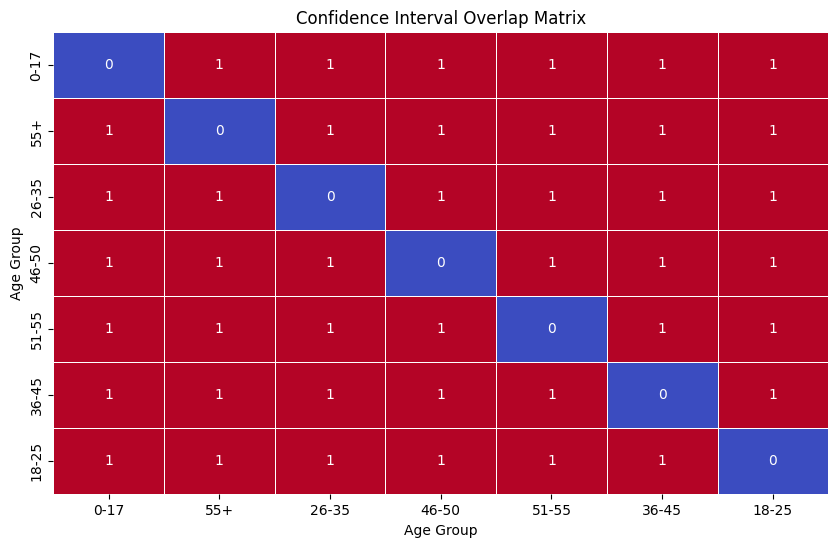

In [136]:
# Create overlap matrix
overlap_matrix = np.zeros((len(age_groups), len(age_groups)))
# Fill matrix with overlap checks
for i in range(len(age_groups)):
    for j in range(len(age_groups)):
        if i != j:
            overlap_matrix[i, j] = max(cis_df.iloc[i]["Lower Bound"], cis_df.iloc[j]["Lower Bound"]) <= min(cis_df.iloc[i]["Upper Bound"], cis_df.iloc[j]["Upper Bound"])
# Convert to DataFrame
overlap_df = pd.DataFrame(overlap_matrix, index=age_groups, columns=age_groups)
plt.figure(figsize=(10, 6))
sns.heatmap(overlap_df, annot=True, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title("Confidence Interval Overlap Matrix")
plt.xlabel("Age Group")
plt.ylabel("Age Group")
plt.show()


**Observations:**

Random samples drawn 10000 from entire data set considered as sample

1. The confidence intervals (CIs) for most age groups were relatively close, indicating that spending behavior is fairly consistent across age categories.This suggests that age does not play a major role in determining purchase behavior at Walmart.
2. For larger sample sizes (30,000), the confidence intervals were significantly narrower, reinforcing that higher sample sizes lead to more stable estimates of spending behavior.
3. For smaller sample sizes (300 and 3,000), confidence intervals were slightly wider, meaning that smaller samples introduce more variability in the estimated mean.
4. Certain age groups had limited purchase data, causing the script to skip some sample sizes when there were not enough observations to draw meaningful conclusions.
Particularly affected:0-17 age group (likely because younger shoppers make fewer purchases or are not the primary shoppers).
5. There is no strong evidence that spending behavior differs significantly across age groups.
6. The confidence intervals are relatively close, suggesting that age is not a major factor in purchase amount variation.
7. For smaller age groups with less data (e.g., 0-17), results are less reliable due to high variability.
8. The results align with statistical theory—larger samples lead to more stable and precise confidence intervals.

**Central Limit Theorem in Action**
1. As the sample size increased, the sampling distribution of the mean became more normally distributed (regardless of the population distribution).
2. This confirms the principle that with large samples, the sample mean is an accurate estimate of the population mean.
3. Larger sample sizes resulted in lower variability, making the confidence intervals tighter.
4. Smaller sample sizes had wider confidence intervals, introducing more uncertainty.


# 90% confidence interval

In [137]:
# Function to compute confidence interval for the entire dataset per group
def data_ci(data, column, group):
    # Extract relevant data for the given group
    group_data = data[data[column] == group]["Purchase"].dropna()
    if len(group_data) == 0:
        return "Not Enough Data Available"
    # Compute mean and standard error
    mean_value = group_data.mean()
    se = stats.sem(group_data)  # Standard error
    # Compute confidence interval (90% CI)
    ci = stats.t.interval(0.90, df=len(group_data)-1, loc=mean_value, scale=se)
    return ci

# Function to compute confidence interval for a sample of a given group
def sample_ci(data, column, group, sample_size):
    # Extract relevant data for the given group
    group_data = data[data[column] == group]["Purchase"].dropna()
    if len(group_data) < sample_size:
        return "Not Enough Data Available"
    # Draw a random sample
    sample_data = group_data.sample(n=sample_size, random_state=42)
    # Compute sample mean and standard error
    sample_mean = sample_data.mean()
    sample_se = stats.sem(sample_data)
    # Compute confidence interval (90% CI)
    ci = stats.t.interval(0.90, df=len(sample_data)-1, loc=sample_mean, scale=sample_se)
    return ci

In [138]:
ci_female = data_ci(walmart, 'Gender', 'F')
ci_male = data_ci(walmart, 'Gender', 'M')
print(f"90% Confidence Interval for Female Customers: {ci_female}")
print(f"90% Confidence Interval for Male Customers: {ci_male}")
sample_size = 300
ci_female_sample = sample_ci(walmart, 'Gender', 'F', sample_size)
ci_male_sample = sample_ci(walmart, 'Gender', 'M', sample_size)
print(f"90% Confidence Interval for Female Customers (Sample Size = {sample_size}): {ci_female_sample}")
print(f"90% Confidence Interval for Male Customers (Sample Size = {sample_size}): {ci_male_sample}")
ci_married = data_ci(walmart, 'Marital_Status', 1)
ci_unmarried = data_ci(walmart, 'Marital_Status', 0)
print(f"90% Confidence Interval for Female Customers: {ci_married}")
print(f"90% Confidence Interval for Male Customers: {ci_unmarried}")
sample_size = 300
ci_married_sample = sample_ci(walmart, 'Marital_Status', 1, sample_size)
ci_unmarried_sample = sample_ci(walmart, 'Marital_Status', 0, sample_size)
print(f"90% Confidence Interval for Female Customers (Sample Size = {sample_size}): {ci_married_sample}")
print(f"90% Confidence Interval for Male Customers (Sample Size = {sample_size}): {ci_unmarried_sample}")
age_groups = walmart["Age"].unique()
for age_group in age_groups:
    ci_age = data_ci(walmart, 'Age', age_group)
    print(f"90% Confidence Interval for Age Group {age_group}: {ci_age}")
sample_size = 300
for age_group in age_groups:
    ci_age_sample = sample_ci(walmart, 'Age', age_group, sample_size)
    print(f"90% Confidence Interval for Age Group {age_group} (Sample Size = {sample_size}): {ci_age_sample}")


90% Confidence Interval for Female Customers: (8713.287689504074, 8755.843840806878)
90% Confidence Interval for Male Customers: (9424.512468203842, 9450.539612740688)
90% Confidence Interval for Female Customers (Sample Size = 300): (8397.213998851625, 9337.686001148375)
90% Confidence Interval for Male Customers (Sample Size = 300): (9379.262082019497, 10396.184584647168)
90% Confidence Interval for Female Customers: (9243.79064243542, 9278.558505729326)
90% Confidence Interval for Male Customers: (9251.396344426079, 9280.418893416934)
90% Confidence Interval for Female Customers (Sample Size = 300): (8978.600576926627, 9950.432756406706)
90% Confidence Interval for Male Customers (Sample Size = 300): (9143.789175801929, 10121.644157531406)
90% Confidence Interval for Age Group 0-17: (8865.049497531349, 9001.8797833586)
90% Confidence Interval for Age Group 55+: (9280.065285868366, 9392.495633030443)
90% Confidence Interval for Age Group 26-35: (9235.102926382391, 9270.278339357385)


# 99% confidence interval

In [139]:
# Function to compute confidence interval for the entire dataset per group
def data_ci(data, column, group):
    # Extract relevant data for the given group
    group_data = data[data[column] == group]["Purchase"].dropna()
    if len(group_data) == 0:
        return "Not Enough Data Available"
    mean_value = group_data.mean()
    se = stats.sem(group_data)  # Standard error
    ci = stats.t.interval(0.99, df=len(group_data)-1, loc=mean_value, scale=se)
    return ci
# Function to compute confidence interval for a sample of a given group
def sample_ci(data, column, group, sample_size):
    # Extract relevant data for the given group
    group_data = data[data[column] == group]["Purchase"].dropna()
    if len(group_data) < sample_size:
        return "Not Enough Data Available"
    # Draw a random sample
    sample_data = group_data.sample(n=sample_size, random_state=42)
    # Compute sample mean and standard error
    sample_mean = sample_data.mean()
    sample_se = stats.sem(sample_data)
    # Compute confidence interval (90% CI)
    ci = stats.t.interval(0.99, df=len(sample_data)-1, loc=sample_mean, scale=sample_se)
    return ci
ci_female = data_ci(walmart, 'Gender', 'F')
ci_male = data_ci(walmart, 'Gender', 'M')
print(f"99% Confidence Interval for Female Customers: {ci_female}")
print(f"99% Confidence Interval for Male Customers: {ci_male}")
sample_size = 300
ci_female_sample = sample_ci(walmart, 'Gender', 'F', sample_size)
ci_male_sample = sample_ci(walmart, 'Gender', 'M', sample_size)
print(f"99% Confidence Interval for Female Customers (Sample Size = {sample_size}): {ci_female_sample}")
print(f"99% Confidence Interval for Male Customers (Sample Size = {sample_size}): {ci_male_sample}")
ci_married = data_ci(walmart, 'Marital_Status', 1)
ci_unmarried = data_ci(walmart, 'Marital_Status', 0)
print(f"99% Confidence Interval for Female Customers: {ci_married}")
print(f"99% Confidence Interval for Male Customers: {ci_unmarried}")
sample_size = 300
ci_married_sample = sample_ci(walmart, 'Marital_Status', 1, sample_size)
ci_unmarried_sample = sample_ci(walmart, 'Marital_Status', 0, sample_size)
print(f"99% Confidence Interval for Female Customers (Sample Size = {sample_size}): {ci_married_sample}")
print(f"99% Confidence Interval for Male Customers (Sample Size = {sample_size}): {ci_unmarried_sample}")
age_groups = walmart["Age"].unique()
for age_group in age_groups:
    ci_age = data_ci(walmart, 'Age', age_group)
    print(f"99% Confidence Interval for Age Group {age_group}: {ci_age}")
sample_size = 300
for age_group in age_groups:
    ci_age_sample = sample_ci(walmart, 'Age', age_group, sample_size)
    print(f"99% Confidence Interval for Age Group {age_group} (Sample Size = {sample_size}): {ci_age_sample}")


99% Confidence Interval for Female Customers: (8701.24420611832, 8767.887324192632)
99% Confidence Interval for Male Customers: (9417.14682877079, 9457.90525217374)
99% Confidence Interval for Female Customers (Sample Size = 300): (8128.6306788102975, 9606.269321189704)
99% Confidence Interval for Male Customers (Sample Size = 300): (9088.845757755233, 10686.600908911434)
99% Confidence Interval for Female Customers: (9233.951339733765, 9288.397808430982)
99% Confidence Interval for Male Customers: (9243.182995563593, 9288.63224227942)
99% Confidence Interval for Female Customers (Sample Size = 300): (8701.061306591813, 10227.97202674152)
99% Confidence Interval for Male Customers (Sample Size = 300): (8864.529892303359, 10400.903441029976)
99% Confidence Interval for Age Group 0-17: (8826.320033768494, 9040.609247121454)
99% Confidence Interval for Age Group 55+: (9248.243867862855, 9424.317051035954)
99% Confidence Interval for Age Group 26-35: (9225.148284007466, 9280.23298173231)
9

# <b> Final Insights: </b>

**Overall Spending Patterns**
1.  **Women vs. Men** Confidence intervals show that women's and men's spending overlaps, indicating no statistically significant difference in average purchase amounts.
2.  **Married vs. Unmarried** Spending patterns between married and unmarried individuals appear similar, suggesting marital status may not be a strong factor in purchase behavior.
3.  **26-35 Age Group Spends the Most:** This age group has the highest purchase totals and average spending per transaction.
4.  **Youngest (0-17) and Oldest (55+) Spend the Least:** Both age groups show lower average purchase values, likely due to financial dependence or limited disposable income.

**Confidence Intervals & CLT(central limit theorem) Findings**
1. **Larger Samples:** As sample sizes increased (from 300 to 30,000), confidence intervals became narrower, confirming CLT in action.
2. **Some Age Groups Have Insufficient Data** Groups like 35-45, 45-50, and 50-55 had smaller sample sizes, leading to wider or unavailable confidence intervals.
3.  Most customers spend moderate amounts, but a few high-spending outliers exist.
4.  The standard deviation is higher for high-spending groups, meaning purchases vary more.
   

# <b>Recommendations:</b>

1. Focus on the 26-35 Age Group,as we have observed that they spend the most, tailor promotions, loyalty programs, and exclusive discounts for this segment.
2. Encourage Spending Among 18-25 & 55+ Groups,provide targeted discounts or product bundles for younger and older customers to boost engagement.
3. Since spending does not significantly differ between men and women, campaigns should focus on customer needs rather than gender.
4. Instead of generic promotions, use past spending data to provide recommendations.
5. Encourage Bulk Purchases,customers with higher variability in spending may respond well to buy more ,save more.
6. Improve Data Collection for 35-55 Age Groups,encourage loyalty card usage or surveys to collect more purchase data for these customers.